# Funzioni

*(Sezioni da 5.1 a 5.8 del libro di testo)*

Abbiamo usato varie funzioni nei nostri programmi Python: `max`, `round`, `randint`, etc... Vediamo in questa lezione come definire delle nuove funzioni.

## Definire nuove funzioni

È possibile creare nuove funzioni usando la sintassi:
```python
def nome_funzione(parametro_1, parametro_2, ..., parametro_n):
   corpo_della_funzione
```
Ad esempio, il seguente codice definisce una funzione chiamata `area_rettangolo` che ha due parametri chiamati `base` ed  `altezza`.

In [1]:
def area_rettangolo(base, altezza):
    area = base * altezza
    return area

Quando la funzione viene chiamata (o, usando un termine più tecnico, **invocata**) i valori degli argomenti passati tra parentesi tonde vanno a finire nelle variabili `base` e `altezza`, dopo di ché viene eseguito il corpo della funzione. Questa funzione, in particolare, moltiplica il valore di base e altezza, mette il risultato nella variabile altezza, e usa la nuova istruzione `return`. L'istruzione `return` termina l'esecuzione della funzione, **restituendo** al chiamante il valore indicato (in questo caso, il valore della variabile `area`).

In [2]:
# invoca area_rettangolo con i valori 6 e 5 restituisce 30, che è il loro prodotto.
area_rettangolo(6, 5)

30

In [3]:
# se invoco area rettangolo con un solo parametro ottengo un errore
area_rettangolo(2)

TypeError: area_rettangolo() missing 1 required positional argument: 'altezza'

Un frammento di codice Python come `area_rettangolo(6, 5)` è una *espressione*, alla pari di `3+5`, `abs(-4)*4 +2`, `"ciao"*2`, etc... Essa cioè restituisce un valore, che ovviamente possiamo combinare in espressioni più complesse come `area_rettangolo(6,5)*2+15`. Quando viene eseguita una cella del notebook, viene automaticamente stampato il valore dell'ultima espressione calcolata. Ma vi ricordo che in un programma non c'è nessuna stampa automatica del valore delle espresioni. Pertanto, se in un programma si vuole stampare esplcitamente il valore di `area_rettangolo(6, 5)` bisogna farlo con 
```python
print(area_rettangolo(6, 5))
```

Vediamo, come ulteriore esempio, una funzione che calcola l'area di un cerchio.

In [4]:
# questa funzione restituisce l'area di un cerchio il cui raggio gli viene passato come parametro
def area_cerchio(raggio):
    area = 3.14 * raggio * raggio
    return area

In [5]:
area_cerchio(2)

12.56

Questo è lo schema generale della definizione di funzione:

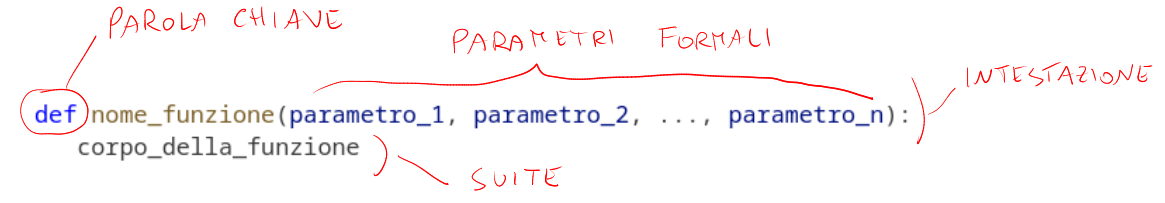

I parametri sono più correttamente chiamati **parametri formali**.

Questo invece è lo schema generale della invocazione di funzione:

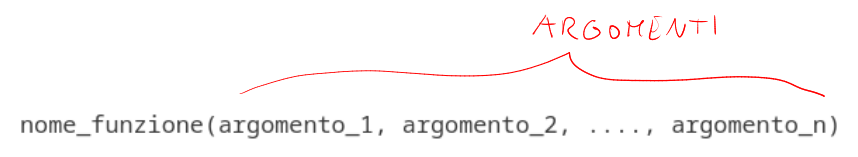

Gli argomenti sono chiamati anche **parametri attuali** (brutta traduzione del termine inglese *actual*) o **parametri effettivi**.

### Funzioni che non restituiscono un risultato

L'istruzione `return` non è strettamente necessaria. Se una funzione non restituisce nulla di utile, si può omettere: la funzione termina naturalmente quando finisce il corpo. Ad esempio:

In [6]:
# Questa funzione stampa la stringa s contornata da asterischi, e non restituisce nulla
def stampa_evidenziata(s):
    print("*" * (len(s)+2))
    print("*", s, "*", sep="")
    # in alternativa, print(f"*{s}*")
    print("*" * (len(s)+2))

Notare il parametro speciale `sep` che consente di specificare la stringa utilizzata per separare  gli argomenti. Normalmente è uno spazio, ma poiché qui non vogliamo mettere spazi tra gli asterischi e la stringa `s`, impostiamo `sep` alla stringa vuota.

In [7]:
stampa_evidenziata("ciao")

******
*ciao*
******


In realtà le funzioni restituiscono sempre qualcosa. Quando sembra che non restituiscono nulla, in realtà restituiscono il valore `None` del tipo `NoneType` (esattamente come la funzione `print`).

In [8]:
ris = stampa_evidenziata("ciao")

******
*ciao*
******


In [9]:
print(ris)

None


In [10]:
type(ris)

NoneType

## Esecuzione passo-passo di un programma con funzioni

Consideriamo il seguente programma.

In [11]:
def area_rettangolo(base, altezza):
    area = base * altezza
    return area

b = 5
a = 2
a1 = area_rettangolo(b, a)
a2 = area_rettangolo(7, 4)
print(a1,a2)

10 28


Questa è la sua esecuzione passo-passo.

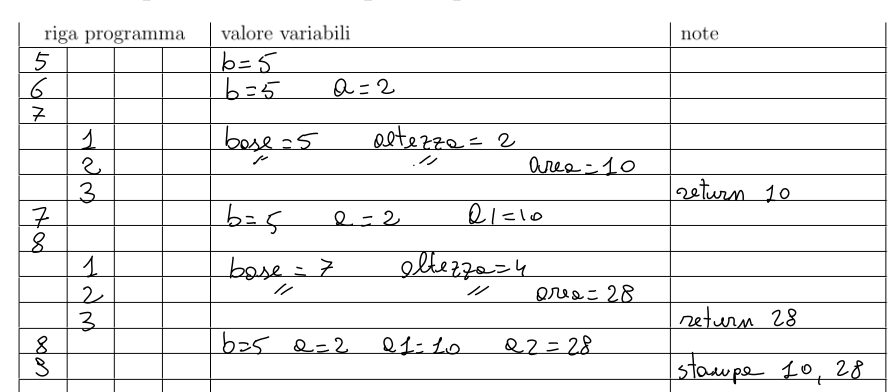

Notare che, per la prima volta, usiamo le colonne multiple per le righe del programma: **ci spostiamo verso destra ogni volta che viene invocata una funzione, e torniamo a sinistra quando l'esecuzione della funzione termina**.

## Funzioni ed interazione con l'utente

Normalmente le funzioni non dovrebbero interagire con l'utente (usando operazioni come `input` e `print`). Questo perché le funzioni prendono i valori da cui operare dai parametri, e restituiscono i valori calcolati con l'istruzione `return`. In questo modo esse implementano un algoritmo che è riutilizzabile in altri contesti.

Vediamo per esempio il caso di una funzione che prende una stringa e inserisce uno spazio tra un carattere ed un altro (può essere utile per evidenziare qualche scritta):


In [9]:
def add_space(s):
    news = ""
    for c in s:
        news += c
        news += " "
    return news

add_space("ciao")

'c i a o '

Supponiamo adesso di voler scrivere un programma che prende in input una stringa e la rivisualizza evidenziata con gli spazi:

In [10]:
s = input("Inserisci stringa: ")
s_evidenziata = add_space(s)
print("La stringa evidenziata è", s_evidenziata)

La stringa evidenziata è c i a o 


Supponiamo adesso di aver cambiato idea, e vogliamo modificare il programma in modo da rimpiazzare gli spazi con degli asterischi. Grazie al metodo `replace` del tipo stringa, si può fare facilmente.

In [16]:
s = input("Inserisci stringa: ")
s_evidenziata = add_space(s).replace(" ", "*")
print("La stringa evidenziata è", s_evidenziata)

La stringa evidenziata è c*i*a*o*


Tutto questo è possibile perché `add_space` non stampa il risultato, ma lo restituisce al chiamante che poi decide cosa farci. Supponiamo invece che avessi optato per stampare direttamente la stringa con gli spazi, nella funzione qui sotto:

In [14]:
def add_space_bad(s):
    news = ""
    for c in s:
        news += c
        news += " "
    print("La stringa evidenziata è", news)  # abbiamo sostituito il return con una print spazi

Il primo dei due programmi possiamo ancora scriverlo, è questo qua:

In [18]:
s = input("Inserisci stringa: ")
add_space_bad(s)

La stringa evidenziata è c i a o 


Ma il secondo adesso non lo posiamo scrivere usando `add_space_bad`, perchè una volta che la stringa con gli spazi è stata stampato, non è più possibile cambiare gli spazi in asterischi !!!

Ci possono essere delle eccezioni alla regola di non interagire con l'utente. D'altronde `input` e `print` fanno proprio questo. Ma in questo caso l'interazione con l'utente è proprio lo scopo principale di queste funzioni, e non fanno nient'altro. In generale è combinare interazioni con l'utente ed operazioni di altro tipo che non andrebbe fatto in una funzione ma solo nel programma principale.

Un'altra possibile eccezione a questa rigola è per il debugging. Se una funzione non dà il risultato desiderato, dobbiamo trovare qual è il problema. Un modo è usare il debugger che l'ambiente di sviluppo ci mette a disposizione. Ma un altro modo, un po' più primitivo ma spesso abbastanza efficace, è di inserire delle print del codice per visualizzare l'evolversi del valore delle variabili. Queste sono però stampe solo a scopo di verifica, ed andrebbero eliminate quando i bug vengono risolti. Ad esempio, la funzione `add_space` con delle stampe di debuggin potrebbe essere così:

In [19]:
def add_space_debug(s):
    print("Chiamata con il valore", s)
    news = ""
    for c in s:
        print("Valore di news attuale:", news)
        news += c
        news += " "
    print("Valore di news finale:", news)
    return news

add_space_debug("ciao")

Chiamata con il valore ciao
Valore di news attuale: 
Valore di news attuale: c 
Valore di news attuale: c i 
Valore di news attuale: c i a 
Valore di news finale: c i a o 


'c i a o '

## Parametri e visibilità delle variabili

### Variabili locali e loro visibilità

I parametri di una funzione sono variabili come tutte le altre. Oltre a leggerli li possiamo anche modificare.

In [18]:
def f1(x):
    print(x)
    x += 1
    print(x)

f1(3)

3
4


Notare però che queste variabili esistono solo dentro il codice della funzione, sono invisibili al di fuori. Sebbene la funzione `f1` usi la variabile `x`, se provo a visualizzarne il valore da fuori la funzione ottengo un errore. In gergo informatico, diciamo che `x` è una **variabile locale**, mentre le variabili che esistono al di fuori di ogni funzione si chiamano **variabili globali**.

In [13]:
print(x)

NameError: name 'x' is not defined

Questa regola non vale solo per i parametri. Qualunque variabile definisco dentro una funzione, esiste solo al suo interno.

In [19]:
def f2(x):
    y = x+1
    print(y)

f2(4)
print(y) # restituisce errore perchè y esiste solo nella funzione f2

5


NameError: name 'y' is not defined

In generale, la parte di un programma dove una variabile è visibile si chiama **ambito di visibilità della variabile** o, in inglese, **variable scope**. L'ambito di visibilità di una variabile locale è la funzione in cui essa è definita.

### Visibilità delle variabili globali

L'ambito di visibilità delle variabili globali è più complesso. Ovviamente sono visibIli all'interno del programma principale, ma non solo. Sono anche accessibili dalle funzioni, ma solo se la funzione si limita a leggerle.

In [3]:
def f3(x):
    print(x + z)

z = 10  # la variabile z è visibile dentro f1
f3(5)
z = 20
f3(5)

15
25


Tuttavia, se probiamo a modificare il valore di una variabile globale dentro una funzione, allora cambia tutto. L'assegnamento renderà la variabile una variabile locale alla funzione, che non ha nulla a che vedere con la variabile globale con lo stesso nome.

In [4]:
def f4(x):
    z = 100
    print(x + z)

z = 10
f4(4)
print(z)

104
10


Dentro la funzione `f4` la variabile `z` viene assegnata a 100, ma questa variabile non ha niente a che vedere con la `z` del programma principale, che continua a valere 10 anche dopo l'esecuzione di `f4`.

Notare che se se una funzione modifica una variabile, allora quella variabile è locale *d'appertutto* nella funzione non solo dal momento in cui viene assegnata. Consideriamo il seguente programma, in cui ho semplicemente aggiunto una istruzione `print(z)` come prima istruzione della funzione.

In [5]:
def f5(x):
    print(z)
    z = 100
    print(x + z)

z = 10
f5(4)
print(z)

UnboundLocalError: cannot access local variable 'z' where it is not associated with a value

Notare che l'istruzione `print(z)` fallisce. Questo perché la presenza dell'istruzione `z = 100` rende `z` una variabile locale di `f5` sin dalla prima riga di `f5`. La variabile `z` che voglio stampare con `print(z)` non è la variabile *globale* z, ma quella *locale*, alla quale però non è stato ancora assegnato alcun valore!

### Modificare il valore di un parametro

È bene puntualizzare che le eventuali modifiche effettuate ai parametri, non si ripercuotono sugli argomenti.

In [6]:
def incremento(x):
    x = x+1
    return x
z = 3
print(incremento(z))

4


Qui la variabile `z` è stata passata al parametro `x` di `incremento`. Il parametro `x` è stato successivamente incrementato, e infatti il risultato di `incremento2(z)` è `4`. Ma `z` è rimasta comunque uguale a 3.

In [7]:
print(z)

3


### Una esecuzione passo passo

Riassumiamo un po' di queste problematiche di visibilità con una esecuzione passo passo.

In [10]:
def incremento(x):
    x = x + 1
    return x

z = 3
print(incremento(z))
print(z)
x = 50
print(incremento(x))
print(x)

4
3
51
50


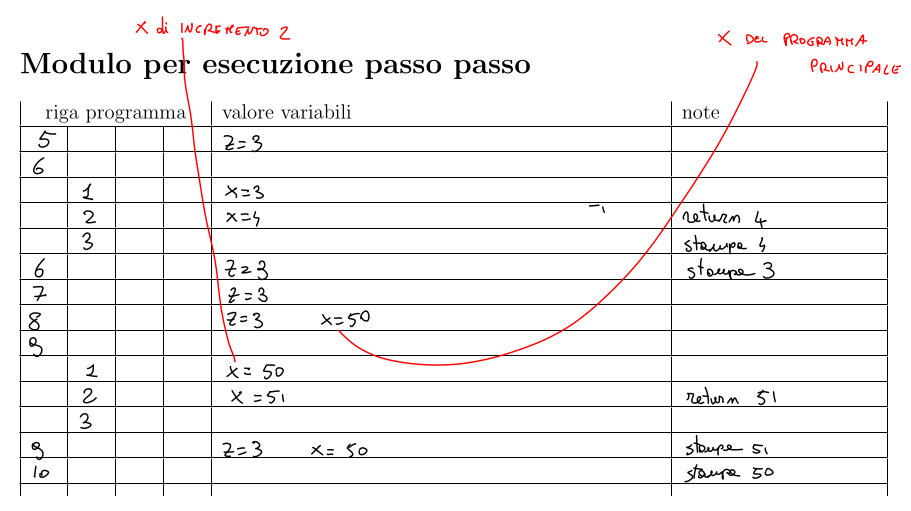

## Un programma più complesso

Consideriamo adesso la soluzione all'esercizio 5 della lezione di laboratorio [Esercizi: Generazione di stringhi e cicli annidati](https://fad.unich.it/mod/page/view.php?id=33143), un programma che preso un intero *n*, stampa l'elenco di tutti i numeri primi da 2 fino ad *n*. Ne scriviamo una nuova versione che divide il suo compito in varie funzioni.

Nella scrittura di questo programma, abbiamo seguito una procedura nota come *raffinamento successivo* (o, *stepwise refinement* in inglese). Siampo partiti dal problema principale, ovvero visualizzare la lista dei numeri primi da 2 fino ad n, per il quale abbiamo scritto la funzione *lista_primi*. Nello scrivere *lista_primi* ci siamo accorti che serve un modo per determinare se un numero è primo o no. Non abbiamo messo il codice direttamente dentro la funzione *lista_primi*, ma abbiamo creato una funzione apposita *primo* per determinare se un certo numero è primo o no: la funzione *lista_primi* utilizza la funzione *primo* al suo interno.

Quando siamo passati a scrivere la funzione *primo*, ci siamo resi conto che ci serviva un modo per determinare se un numero era divisibile per un altro. Anche per questo abbiamo deciso di scrivere una funzione apposita, la funzione *divisibile* da utilizzare all'interno della funzione *primo*.

In questo modo, abbiamo piano piano scomposto il problema di partenza in problemi sempre più piccoli, che sappiamo risolvere. Un altro esempio di questo modo di procedere la trovate nella Sezione 5.7 nel libro di testo.

In [ ]:
# Scrivere un programma che accetta in input un numero positivo n e stampa la lista
# di tutti i numeri primi da 2 fino ad n.
# Esempio: se l'input è 6, l'output sarà 2, 3, 5

def divisibile(a, b):
    # Dati due numeri a e b, restituisce True se a è divisibile per b, False altrimenti.
    risultato = a % b == 0
    return risultato

def primo(n):
    # Dato il numero intero n >= 2, restituisce True se n è un numero primo, False altrimenti.
    primo = True
    for i in range(2, n):
        if divisibile(n, i):
            primo = False
    return primo

def lista_primi(n):
    for candidato_primo in range(2, n+1):
        if primo(candidato_primo):
            print(candidato_primo)

n = int(input("Immetti numero: "))
lista_primi(n)

2
3
5
7
11
13


Ecco alcuni esempi di utilizzo delle singole funzioni che compongono il programma:

In [ ]:
divisibile(6, 3)

True

In [ ]:
divisibile(6, 5)

False

In [ ]:
primo(5)

True

In [ ]:
primo(14)

False

In [ ]:
lista_primi(10)

2
3
5
7


Notiamo che le funzioni si richiamano tra di loro. La funzione `primo` chiama `divisibile` al suo interno, e `lista_primi` chiama `primo`. Quella che segue è l'esecuzione passo-passo del programma.

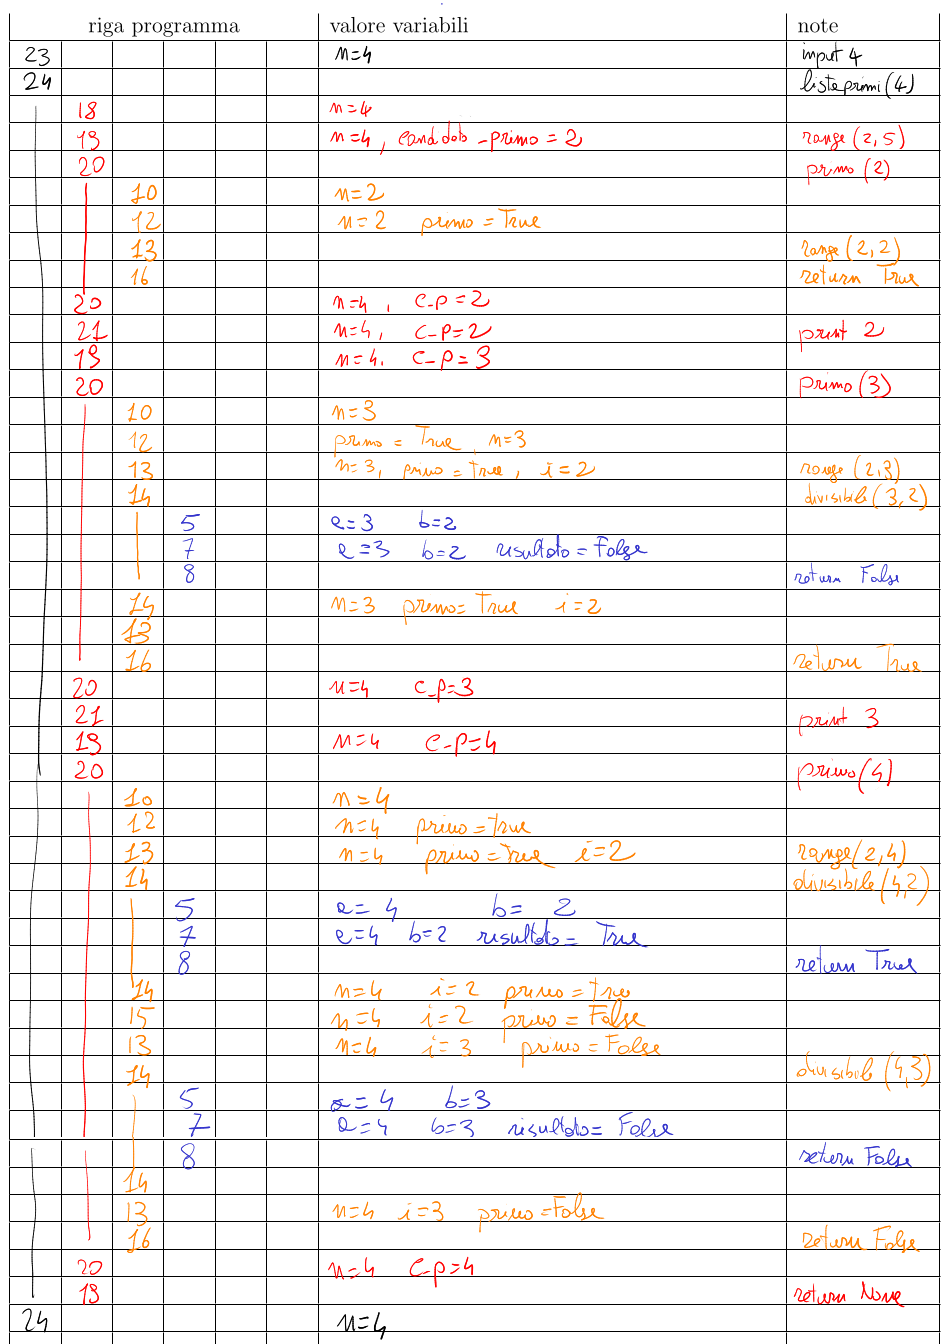

## L'istruzione return per l'uscita anticipata da una funzione

Notare che è possibile ottimizzare in vari modi la funzione `primo`. Una volta che troviamo un divisore di `n`, è inutile continuare il ciclo `for i`, siamo sicuri che il risultato sarà falso. Il primo modo per ottimizzare la funzione è usare l'istruzone `break`, come fatto in lezioni precedenti.

In [26]:
def primo(n):
    primo = True
    for i in range(2, n):
        if divisibile(n, i):
            primo = False
            break   # CI FA USCIRE SUBITO DAL CICLO
    return primo

Ma in realtà, un altro modo per uscire subito dal ciclo e dalla funzione è usare `return`. L'istruzione `return` si può usare in qualunque punto di un programma, e provoca l'uscita immediata dalla stessa. Pertanto, la funzione può essere riscritta così:

In [ ]:
def primo(n):
    for i in range(2, n):
        if divisibile(n, i):
            return False
    return True

## Documentazione di funzioni e *docstring*

Ogni funzione ha una documentazione, alla quale si può accedere con il comando `help`, e che è utilizzata anche dall'ambiente di sviluppo.

In [ ]:
help(round)

Help on built-in function round in module builtins:

round(number, ndigits=None)
    Round a number to a given precision in decimal digits.
    
    The return value is an integer if ndigits is omitted or None.  Otherwise
    the return value has the same type as the number.  ndigits may be negative.



Anche le funzioni che scriviamo noi possono essere dotate di documentazione: è sufficiente scrivere del testo tra l'intestazione della funzione e il corpo, tra delle triple virgolette, come fatto qua sotto Questo tipo di documentazione è chiamata *docstring*.

In [ ]:
def divisibile(a, b):
    """
    Dati due numeri a e b, restituisce True se a è divisibile per b, False altrimenti.
    """
    risultato = a % b == 0
    return risultato

def primo(n):
    """
    Dato il numero intero n >= 2, restituisce True se n è un numero primo, False altrimenti.
    """
    primo = True
    for i in range(2, n):
        if divisibile(n, i):
            primo = False
            break
    return primo

def lista_primi(n):
    # Stampa tutti i primi da 2 fino ad n.
    for candidato_primo in range(2, n+1):
        if primo(candidato_primo):
            print(candidato_primo)


In [ ]:
help(primo)

Help on function primo in module __main__:

primo(n)
    Dato il numero intero n >= 2, restituisce True se n è un numero primo, False altrimenti.



In [ ]:
help(divisibile)

Help on function divisibile in module __main__:

divisibile(a, b)
    Dati due numeri a e b, restituisce True se a è divisibile per b, False altrimenti.



Notare che la funzione `lista_primi`, che non ha una docstring ma un commento standard, non presenta documentazione.

In [ ]:
help(lista_primi)

Help on function lista_primi in module __main__:

lista_primi(n)



## Funzioni senza parametri

Per chiamare una funzione, è sempre necessario mettere le parentesi tonde dopo il nome, anche se la funzione non ha parametri. Ad esempio:

In [1]:
def inutile():
    print("Sono inutile")

Per chiamare la funzione di prima, è necessario mettere le parentesi tonde dopo il nome.


In [2]:
inutile()

Sono inutile


Se dimentichiamo le parentesi tonde, la funzione non viene invocata, ma quello che otteniamo è una cosa strana:

In [11]:
inutile

<function __main__.inutile()>

## Variabili di tipo funzione

I nomi delle funzioni sono in realtà variabili come le altre, solo che invece di contenere un numero, una stringa, un booleano o altro, contengono un oggetto di tipo funzione (`function`). Pertanto, scrivere soltanto il nome della funzione senza le tonde causa semplicemente la visualizzazione del contenuto della variabile. In realtà, non viene stampata propria tutta la funzione, ma solo l'intestazione (un po' rimaeggiata).

In [ ]:
primo

<function __main__.primo(n)>

In [ ]:
abs

<function abs(x, /)>

In [6]:
round

<function round(number, ndigits=None)>

Notare che ci sono cose un po' strane nei risultati per `abs` e `round`. Queste servono ad implementare cose come i parametri opzionali, che vedremo in una lezione successiva.

Siccome `abs`, `print`, `primo` sono variabili come tante, è possibile cambiare il loro valore. Ma facendo casì, la funzione originaria non è più utilizzabile. Ad esempio:

In [13]:
# calcola il valore assoluto di -5
abs(-5)

5

In [14]:
# adesso nella variabile abs metto il valore 4
abs = 4

Se adesso provo a richiamare la funzione abs ottengo un errore: abs non contiene # più una funzione, ma il numero 4, e non ha senso *nvocare un numero*.

In [15]:
abs(-5)

TypeError: 'int' object is not callable

Poiché le funzioni sono valori come gli altri, è possibile copiarli. Per esempio:

In [16]:
# metto nella variabile aaa il valore della variabile min (che contiene una funzione)
aaa = min

In [17]:
# si vede che aaa contiene effetivamente la funzione min
aaa

<function min>

In [18]:
# e quindi la posso chiamare e genera lo stesso effetto di min
aaa(3,4,5)

3

In [19]:
# anche se ad un certo punto modifico min, aaa continua a calcolare il minimo
min = 45
aaa(4,3,5)

3

In [20]:
# ma min non funziona più, perché ora min contiene il numero 45
min(4,3,5)

TypeError: 'int' object is not callable